In [1]:
using Images
using ResumableFunctions
using Interpolations
import ImageMagick
using Images

In [2]:
const char2digits = Dict('0'=>(0,0,0),
    '1'=>(0,0,1),
    '2'=>(0,1,0),
    '3'=>(0,1,1),
    '4'=>(1,0,0),
    '5'=>(1,0,1),
    '6'=>(1,1,0),
    '7'=>(1,1,1),
    '8'=>(0,0,1),
    '9'=>(1,0,0,1))
const on_color = colorant"lightsteelblue"
const off_color = colorant"steelblue3"

In [3]:
function block2img(block, n::Int)
    img = zeros(RGB{N0f8}, n, n)
    len = n^2
    i = 1
    j = 1
    while i<len
        digits = RGB{N0f8}.(char2digits[block[j]])
        j+=1
        maxsize = min(size(digits,1), len-i)
        digits = digits[1:maxsize]
        img[i:i+maxsize-1] .= digits
        i+=maxsize
    end
    return img
end

block2img (generic function with 1 method)

In [4]:
@resumable function fileReader()
    file = open("pi-million.txt","r")
    while !eof(file)
        i = read(file, Char)
        @yield i
    end
    close(file)
end

fileReader (generic function with 1 method)

In [6]:
function style(img::Matrix{RGB{N0f8}})
    colored = copy(img)
    black = colorant"black"
    white = colorant"white"
    for ix in LinearIndices(colored)
        if(colored[ix]==black)
            colored[ix] = off_color
        else
            colored[ix] = on_color
        end
    end
    return imresize(colored, (200, 200), method=BSpline(Constant()))
end

style (generic function with 1 method)

In [7]:
function search(img::Matrix{RGB{N0f8}})
    n = size(img, 1)
    len = n*n
    charlen = convert(Int, ceil(len/3))
    iter = fileReader()
    chars = [iter() for _ in 1:charlen]
    video = []
    while true
        value = block2img(chars,n)
        #push!(video, imresize(value, (200, 200), method=BSpline(Constant())))
        push!(video, style(value))
        if(value == finding)
            break;
        end
        popfirst!(chars)
        newchar = iter()
        if(isnothing(newchar)) 
            return "supersad"
        end
        push!(chars, iter())
    end
    lastblock = video[size(video, 1)]
    for _ in 1:30
        push!(video, lastblock)
    end
    video = cat(video..., dims=3)
    ImageMagick.save("test.gif", video, fps=24)
end

search (generic function with 1 method)

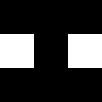

In [5]:
finding = RGB.([0 0 0;
     1 0 1;
     0 0 0])

In [8]:
search(finding)